In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import os

In [10]:
INPUT_PATH = 'Data/spotify_top_music_cleaned.csv'
OUTPUT_PATH = 'Data/Results/spotify_clustered.csv'

os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)

In [11]:
df = pd.read_csv(INPUT_PATH)

features = ['bpm', 'nrgy', 'dnce', 'db', 'live', 'val', 'dur', 'acous', 'spch', 'pop']
X = df[features]

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df['pca_1'] = principal_components[:, 0]
df['pca_2'] = principal_components[:, 1]

print(f"Explained variance by PCA components: {pca.explained_variance_ratio_.sum():.2f}")

Explained variance by PCA components: 0.41


In [16]:
inertia = []
silhouette_scores = []
K_RANGE = range(2, 11)

for k in K_RANGE:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

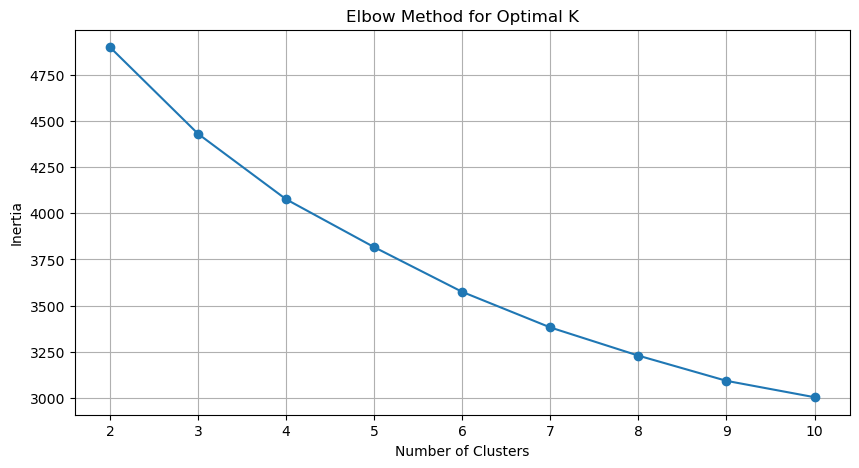

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(K_RANGE, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [20]:
OPTIMAL_K = 4


In [21]:
kmeans_final = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init=10)
df['cluster'] = kmeans_final.fit_transform(X_scaled).argmin(axis=1)

In [22]:
df.to_csv(OUTPUT_PATH, index=False)
print(f"Clustered data saved to {OUTPUT_PATH} with {OPTIMAL_K} clusters.")

Clustered data saved to Data/Results/spotify_clustered.csv with 4 clusters.
